In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy

In [2]:
plasmid = 0
promoter_id = 0

time_points = np.array([0.0,5.0,10.0,20.0,30.0])
GQ_on_values = [1.0, 2.0]
eR_on_values = [0.5,1.0]
eR_off=0
path="/scratch/sb95/R-loop/Runs_eRoff/"

(8.0, 17.0)

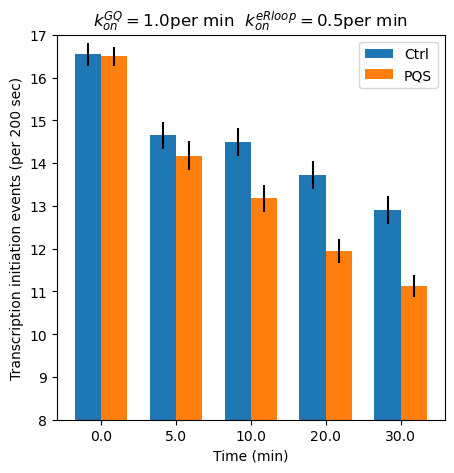

In [11]:
topo_id = 0
x =  np.arange(len(time_points))
width=0.35

dt=200

fig2,ax2 = plt.subplots(1,1, figsize=(5,5), dpi=100)

for GQ_on_id, GQ_on_val in enumerate(GQ_on_values):
    for eR_on_id, eR_on_val in enumerate(eR_on_values):
        for PQS_id in [0,1]:
            init_events = {}
            if PQS_id==0:
                width=-0.35
            else:
                width=0.35
            ii=0
            if GQ_on_val==1.0 and eR_on_val==0.5: pass
            else: continue

            for replica in range(128):
                try:
                    df = pd.read_table(path+f"sig-0.06/outputfiles/RUN_{plasmid}_{promoter_id}_{GQ_on_id}_{eR_on_id}_{topo_id}_{eR_off}_{PQS_id}/event_{replica}.log", 
                                    delimiter=" ", names=['time','event'])#, dtype=(float, int))
                    ii+=1
                    for t_min in time_points:
                        rnap_recruitment_events = df.query(f'{t_min}*60<=time<{t_min}*60+{dt}').query('event==0').shape[0]
                        # print(t_min, rnap_recruitment_events, hasattr(init_events, str(t_min)))
                        if t_min in init_events:
                            init_events[t_min].append(rnap_recruitment_events)
                        else:
                            init_events[t_min] = [rnap_recruitment_events]
                except(FileNotFoundError): 
                    print(f"RUN_{plasmid}_{promoter_id}_{GQ_on_id}_{eR_on_id}_{topo_id}_{PQS_id}", replica)
            if PQS_id==1: label="PQS"
            elif PQS_id==0: label="Ctrl"
            # with open(f"{label}.txt", 'w') as fo:
            #     for xx in init_events:
            #         fo.write(f"{np.mean(init_events[xx])}\t {scipy.stats.sem(init_events[xx])}\n" )
            
            ax2.bar(x+width/2, [np.mean(init_events[xx]) for xx in init_events], width, yerr=[scipy.stats.sem(init_events[xx]) for xx in init_events],label=label)
            ax2.set_title("$k^{GQ}_{on}=$"+str(GQ_on_val)+"per min  $k^{eRloop}_{on}=$"+str(eR_on_val)+"per min")

ax2.set_xticks(x)
ax2.set_xticklabels([str(xx) for xx in time_points])
ax2.legend(loc='upper right')
ax2.set_ylabel("Transcription initiation events (per 200 sec)")
ax2.set_xlabel("Time (min)")
ax2.set_ylim(8,17)

Text(0, 0.5, 'Probability')

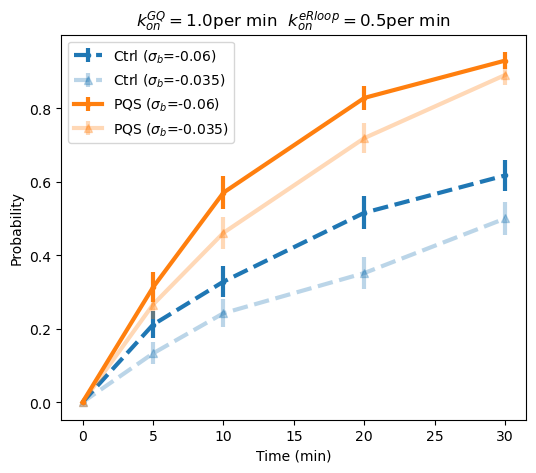

In [9]:
width=0.35

fig2,ax2 = plt.subplots(1,1, figsize=(6,5), dpi=100)

dt=200
width=0.3
topo_vals = [0,0]

for PQS_id,ls in zip([0, 1],['--','-']):
    if PQS_id==0: 
        label="Ctrl"
        col='C0'
    elif PQS_id==1: 
        label="PQS"
        col="C1"

    for jj, (colx,topo_id) in enumerate(zip(['g','g'],topo_vals)):
        if jj==0: 
            topo = "off"
            alpha=1
            marker="."
            sc=-0.06
        elif jj==1: 
            topo = "on"
            alpha=0.3
            marker="^"
            sc=-0.035

        for GQ_on_id, GQ_on_val in enumerate(GQ_on_values):
            for eR_on_id, eR_on_val in enumerate(eR_on_values):
                Rloop = {}
                GQ = {}
                eRloop = {}
                
                if GQ_on_val==1.0 and eR_on_val==0.5: pass
                else: continue
            
                for replica in range(128):
                    if topo=='on':
                        df = pd.read_table(path+f"sig-0.035/outputfiles/RUN_{plasmid}_{promoter_id}_{GQ_on_id}_{eR_on_id}_{topo_id}_0_{PQS_id}/event_{replica}.log", 
                                        delimiter=" ", names=['time','event'])#, dtype=(float, int))
                    elif topo=='off':
                        df = pd.read_table(path+f"sig-0.06/outputfiles/RUN_{plasmid}_{promoter_id}_{GQ_on_id}_{eR_on_id}_{topo_id}_0_{PQS_id}/event_{replica}.log", 
                                        delimiter=" ", names=['time','event'])#, dtype=(float, int))
                    
                    for t_min in time_points:

                        GQ_nucleation = df.query(f"time<{t_min}*60").query("event==122").shape[0]
                        eR_nucleation = df.query(f"time<{t_min}*60").query("event==124").shape[0]

                        if eR_nucleation>1: eR_nucleation=1
                        if GQ_nucleation>1 or eR_nucleation>1: print(GQ_on_val,eR_on_val,eR_nucleation)
                        if t_min in GQ:
                            GQ[t_min].append(GQ_nucleation)
                            eRloop[t_min].append(eR_nucleation)
                        else:
                            GQ[t_min]= [GQ_nucleation]
                            eRloop[t_min] = [eR_nucleation]
                # with open(f"{label}-{topo}.txt", 'w') as fo:
                #     for xx in time_points:
                #         fo.write(f"{np.mean(eRloop[xx])}\t {scipy.stats.sem(eRloop[xx])}\n")
                
                    
                ax2.errorbar(time_points, [np.mean(eRloop[xx]) for xx in time_points],yerr=[scipy.stats.sem(eRloop[xx]) for xx in time_points], 
                    c=col,ls=ls,lw=3, marker=marker, alpha=alpha, label=label+f" ($\\sigma_b$={sc})")

                ax2.set_title("$k^{GQ}_{on}=$"+str(GQ_on_val)+"per min  $k^{eRloop}_{on}=$"+str(eR_on_val)+"per min")
                ax2.legend()
                
ax2.set_xlabel('Time (min)')
ax2.set_ylabel('Probability')
